##Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

c:\Users\tensi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\tensi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\tensi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
ab = pd.read_csv('content/abalone.csv')
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
ab.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
ab.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

##Encoding Categorical Data

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
ab.Sex = le.fit_transform(ab.Sex)

In [12]:
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##Splitting Independent and Dependant variable

In [13]:
X = ab.drop(columns=['Rings','Sex'],axis=1)
y = ab.Rings

In [14]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [15]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [16]:
X.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [17]:
y.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

##Univariate Analysis

In [18]:
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


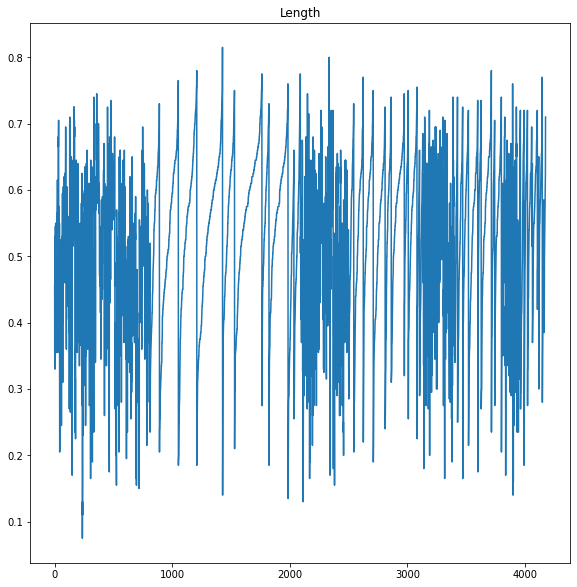

In [19]:
fig = plt.figure(figsize=(5,5))
cx = fig.add_axes([0,0,1.5,1.5])
cx.set_title('Length')
cx.plot(ab.Length)

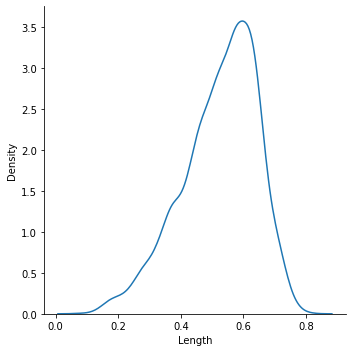

In [20]:
sns.displot(ab.Length,kind='kde')

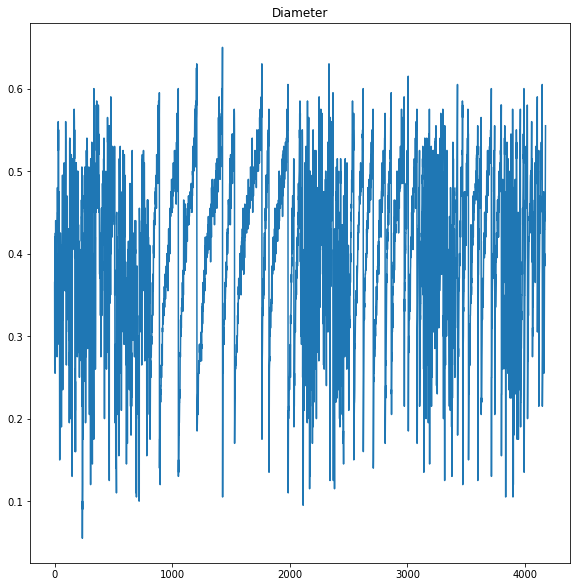

In [21]:
fig = plt.figure(figsize=(5,5))
cx = fig.add_axes([0,0,1.5,1.5])
cx.set_title('Diameter')
cx.plot(ab.Diameter)

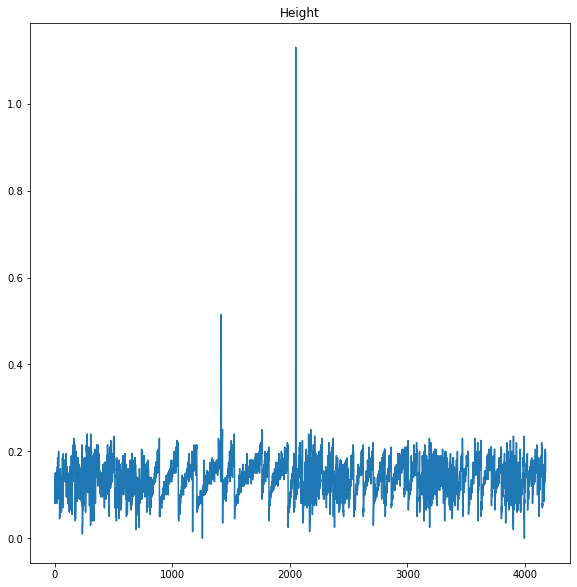

In [22]:
fig = plt.figure(figsize=(5,5))
cx = fig.add_axes([0,0,1.5,1.5])
cx.set_title('Height')
cx.plot(ab.Height)

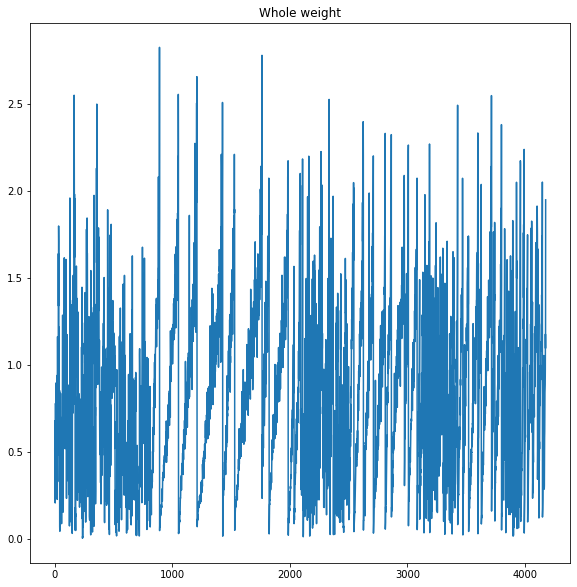

In [23]:
fig = plt.figure(figsize=(5,5))
cx = fig.add_axes([0,0,1.5,1.5])
cx.set_title('Whole weight')
cx.plot(ab['Whole weight'])

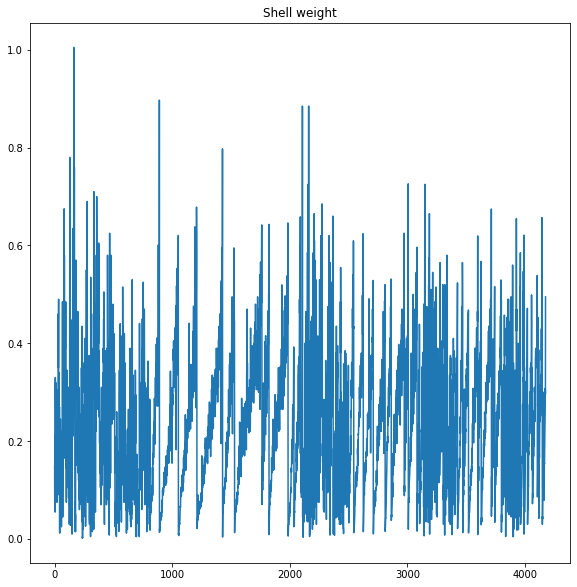

In [24]:
fig = plt.figure(figsize=(5,5))
cx = fig.add_axes([0,0,1.5,1.5])
cx.set_title('Shell weight')
cx.plot(ab['Shell weight'])

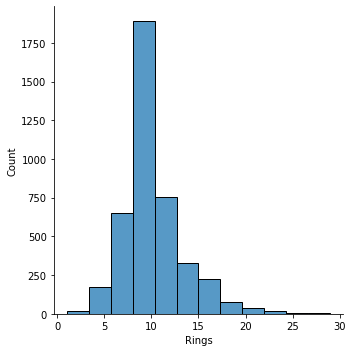

In [25]:
sns.displot(ab.Rings,bins=12)

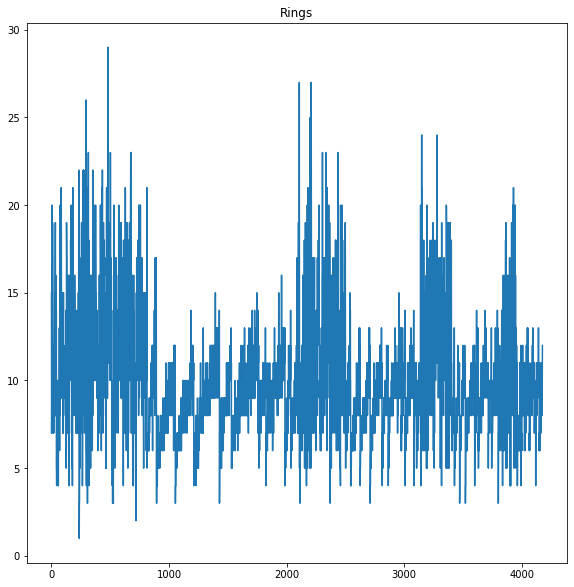

In [26]:
fig = plt.figure(figsize=(5,5))
cx = fig.add_axes([0,0,1.5,1.5])
cx.set_title('Rings')
cx.plot(ab['Rings'])

In [27]:
 sex_count = pd.value_counts(ab.Sex)
 sex_count

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [28]:
rcParams['figure.figsize']= 10,10

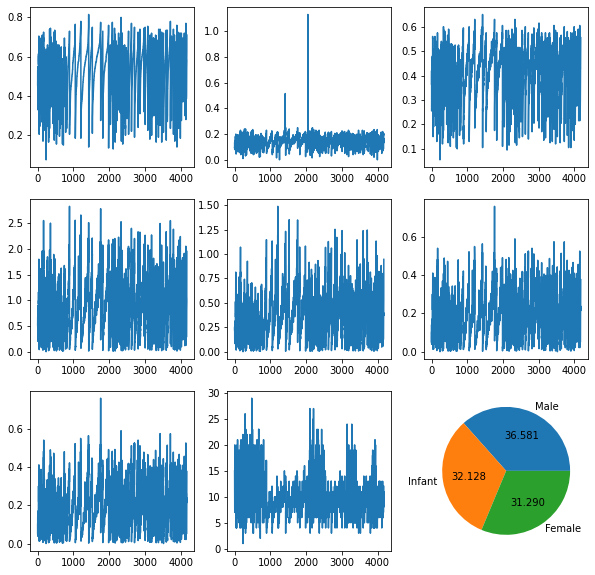

In [29]:
fig,ax = plt.subplots(3,3)
ax[0,0].plot(ab.Length)
ax[0,1].plot(ab.Height)
ax[0,2].plot(ab.Diameter)
ax[1,0].plot(ab['Whole weight'])
ax[1,1].plot(ab['Shucked weight'])
ax[1,2].plot(ab['Viscera weight'])
ax[2,0].plot(ab['Viscera weight'])
ax[2,1].plot(ab.Rings)
ax[2,2].pie(sex_count,labels=['Male','Infant','Female'],autopct='%0.3f')
plt.show()

## Bi-Variate Analysis


In [33]:
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<AxesSubplot:xlabel='Length', ylabel='Diameter'>

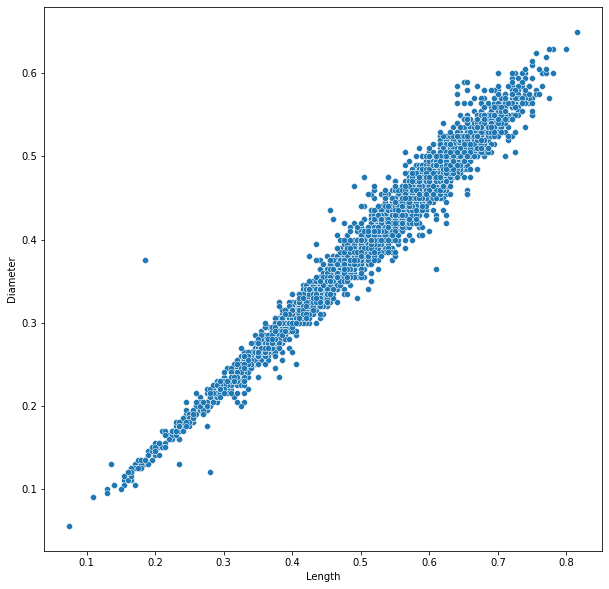

In [35]:
sns.scatterplot(x=ab.Length,y=ab.Diameter)

<AxesSubplot:xlabel='Length', ylabel='Height'>

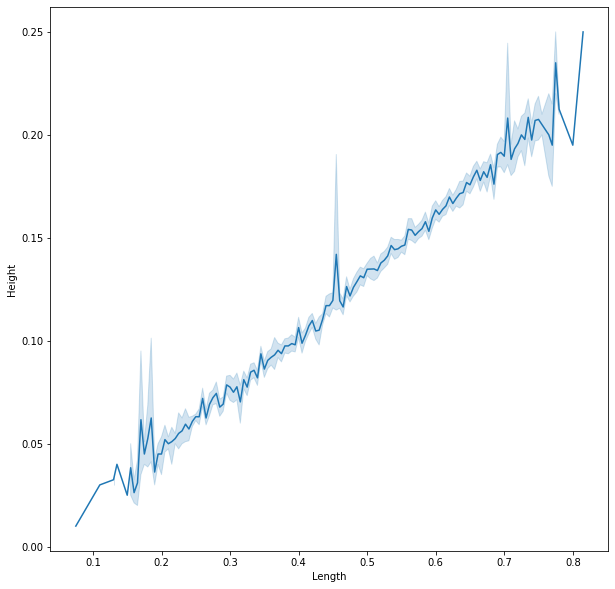

In [37]:
sns.lineplot(x=ab.Length,y=ab.Height)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

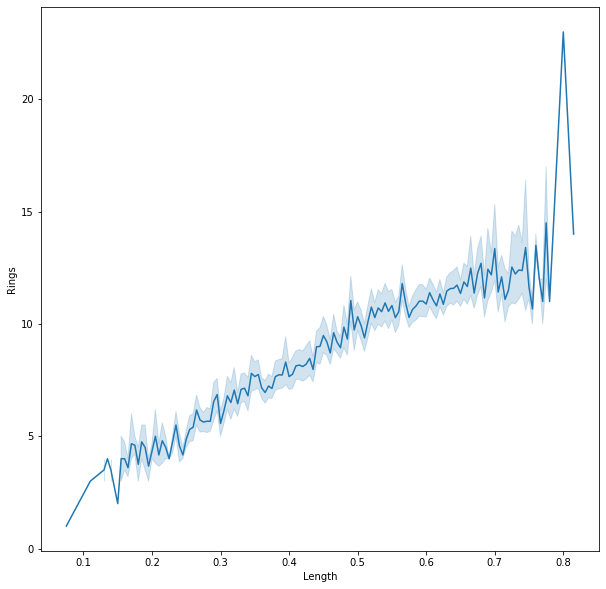

In [38]:
sns.lineplot(x=ab.Length,y=ab.Rings)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

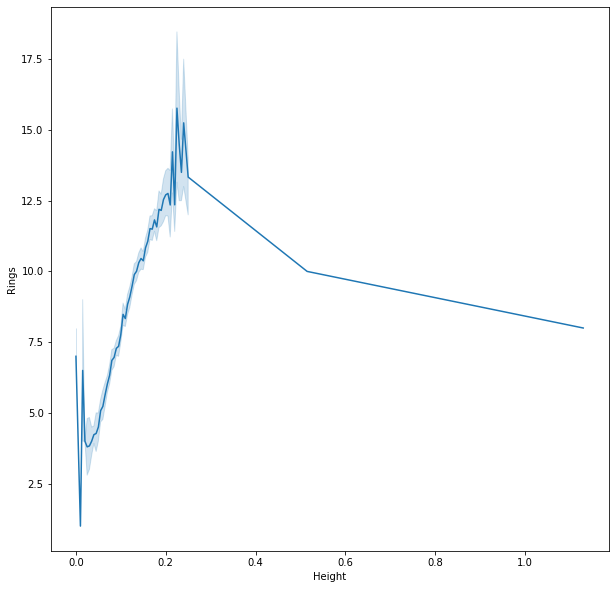

In [39]:
sns.lineplot(x=ab.Height,y=ab.Rings)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

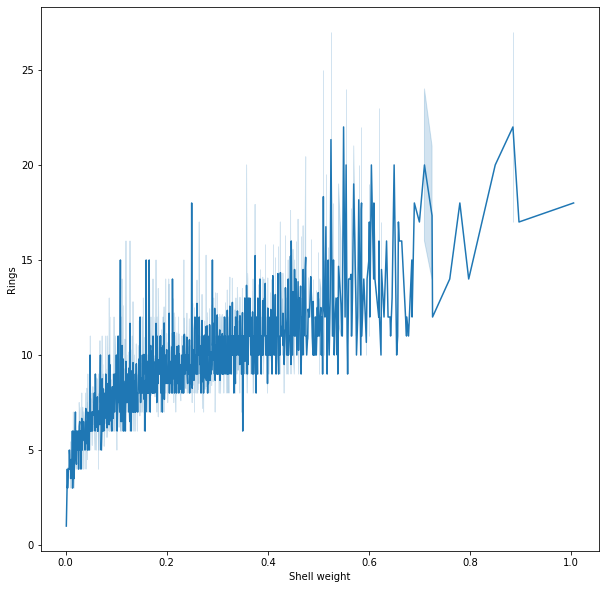

In [41]:
sns.lineplot(x=ab['Shell weight'],y=ab['Rings'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

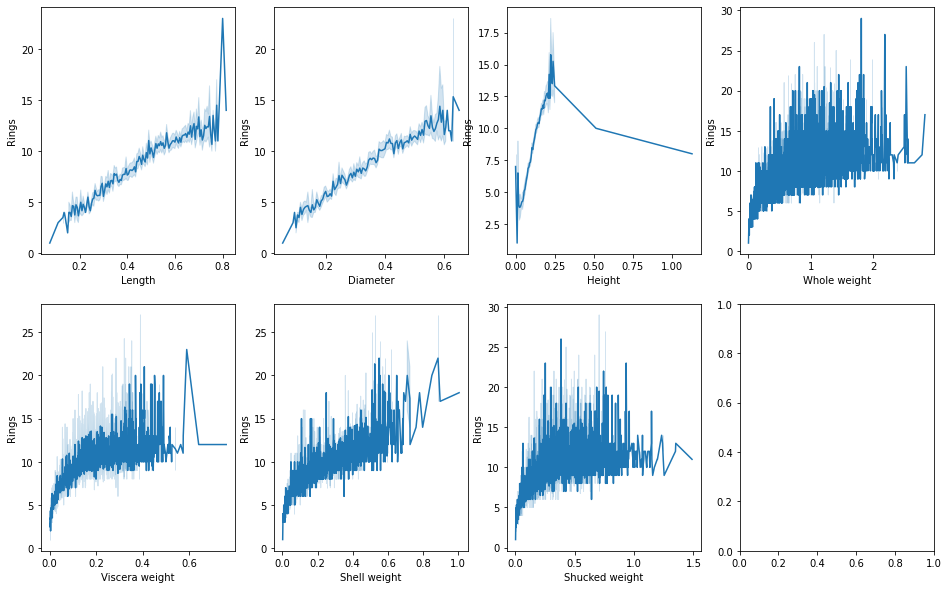

In [43]:
fig,axes = plt.subplots(2,4,figsize=(16,10))
sns.lineplot(x=ab.Length,y=ab.Rings,ax=axes[0,0])
sns.lineplot(x=ab.Diameter,y=ab.Rings,ax=axes[0,1])
sns.lineplot(x=ab.Height,y=ab.Rings,ax=axes[0,2])
sns.lineplot(x=ab['Whole weight'],y=ab.Rings,ax=axes[0,3])
sns.lineplot(x=ab['Viscera weight'],y=ab.Rings,ax=axes[1,0])
sns.lineplot(x=ab['Shell weight'],y=ab.Rings,ax=axes[1,1])
sns.lineplot(x=ab['Shucked weight'],y=ab.Rings,ax=axes[1,2])

##Multivariate Analysis

<AxesSubplot:>

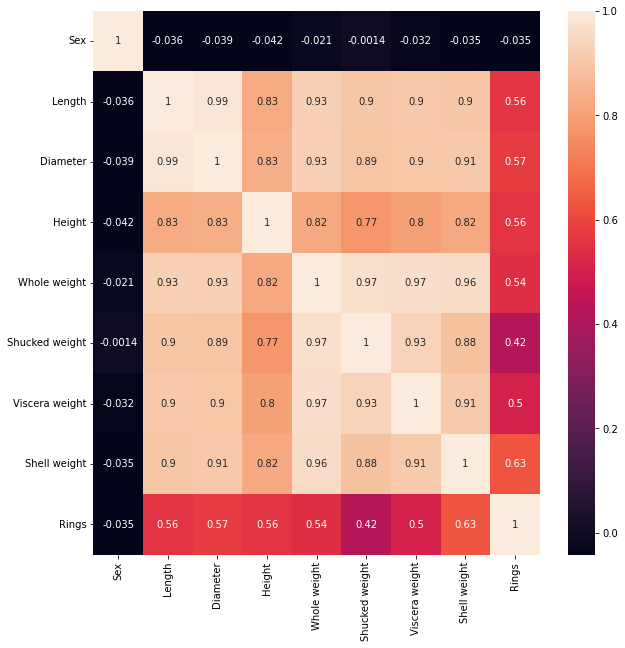

In [44]:
corr = ab.corr()
sns.heatmap(corr,annot=True)

##Descriptive Statistics on Dataset

In [45]:
pd.value_counts(ab.Sex)

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [46]:
ab.Length.describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

In [47]:
ab.Height.describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [48]:
ab.Diameter.describe()

count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

In [49]:
ab.Rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

##Check for Outliers and Replace Them

<AxesSubplot:>

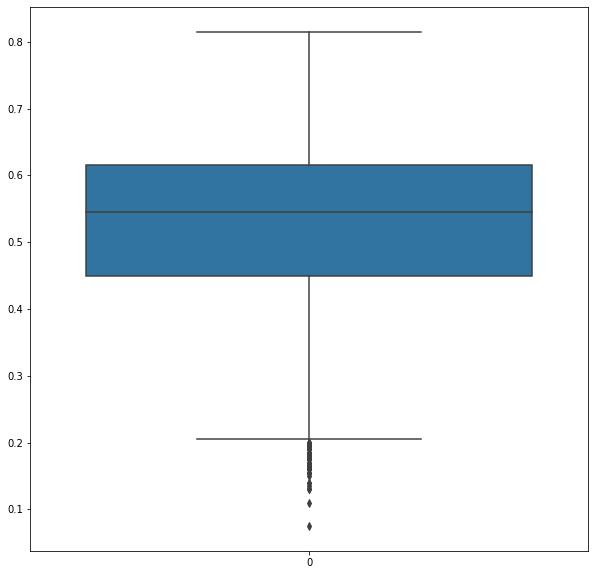

In [50]:
sns.boxplot(ab.Length)

In [51]:
p01 = ab.Length.quantile(0.015)
p01

0.215

<AxesSubplot:>

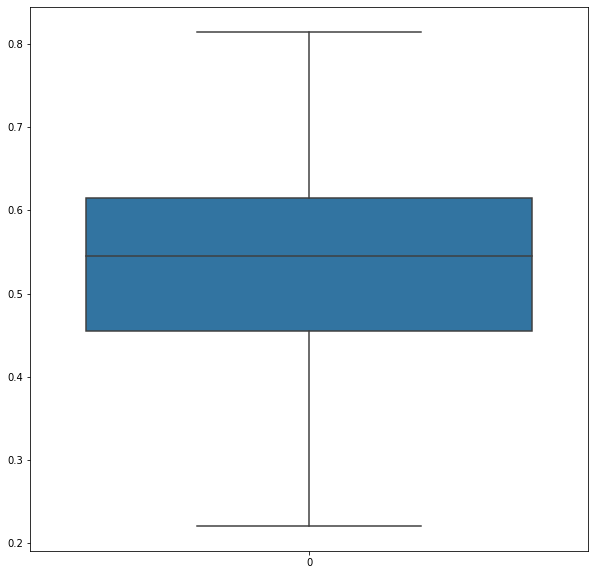

In [52]:
ab = ab[ab.Length > p01]
sns.boxplot(ab.Length)

<AxesSubplot:>

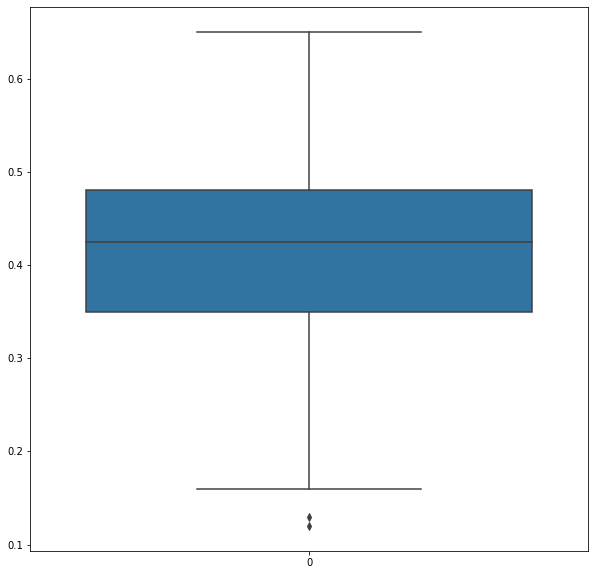

In [53]:
sns.boxplot(ab.Diameter)

In [54]:
p01 = ab.Diameter.quantile(0.01)
p01

0.185

<AxesSubplot:>

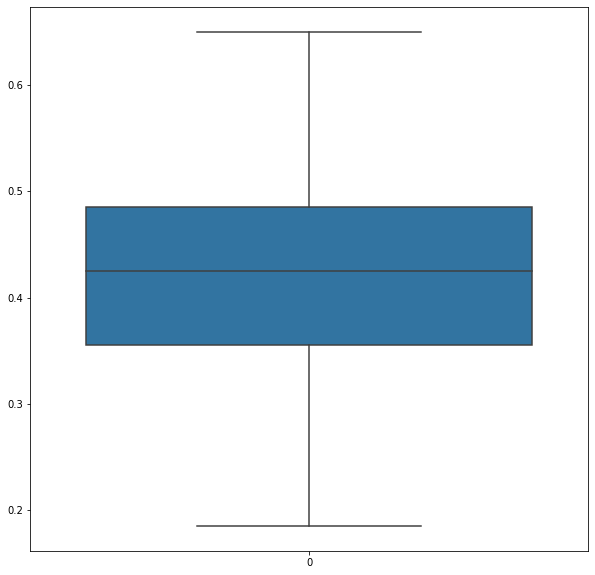

In [55]:
ab = ab[ab.Diameter >= p01]
sns.boxplot(ab.Diameter)

<AxesSubplot:>

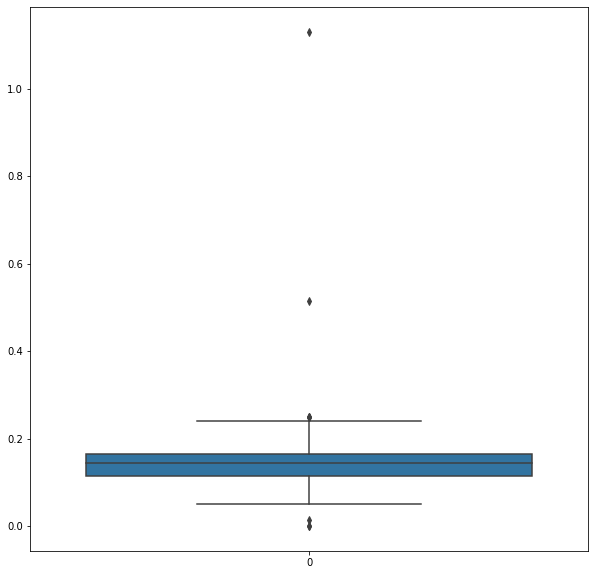

In [56]:
sns.boxplot(ab.Height)

In [57]:
p99 = ab.Height.quantile(0.99)
p99

0.22

<AxesSubplot:>

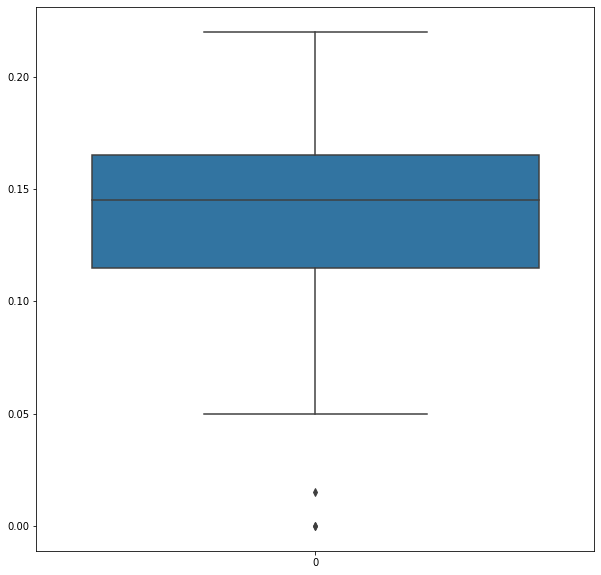

In [58]:
ab = ab[ab.Height <= p99]
sns.boxplot(ab.Height)

In [59]:
p01 = ab.Height.quantile(0.01)
p01

0.065

<AxesSubplot:>

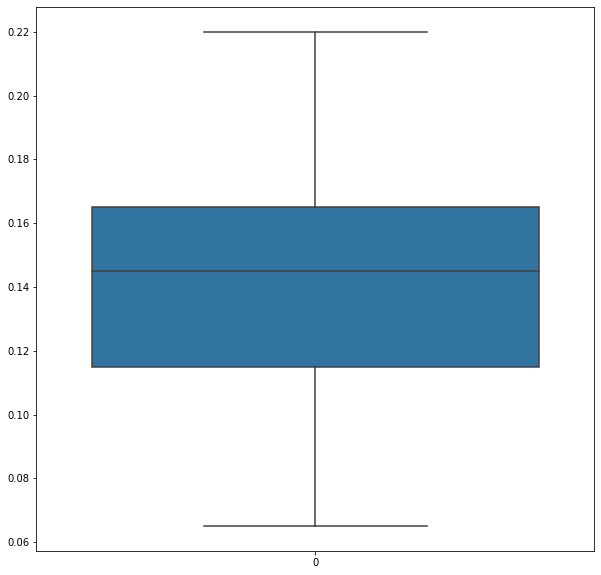

In [60]:
ab = ab[ab.Height >= p01]
sns.boxplot(ab.Height)

<AxesSubplot:>

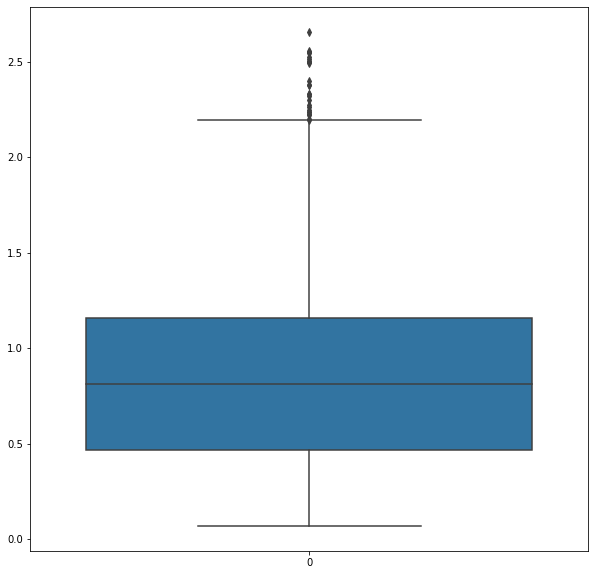

In [61]:
sns.boxplot(ab['Whole weight'])

In [62]:
p99 = ab['Whole weight'].quantile(0.99)
p99

2.1185949999999973

<AxesSubplot:>

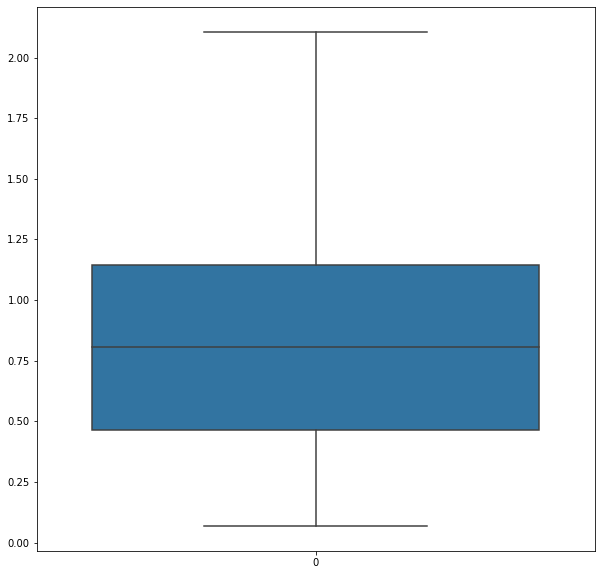

In [63]:
ab = ab[ab['Whole weight'] <= p99]
sns.boxplot(ab['Whole weight'])

<AxesSubplot:>

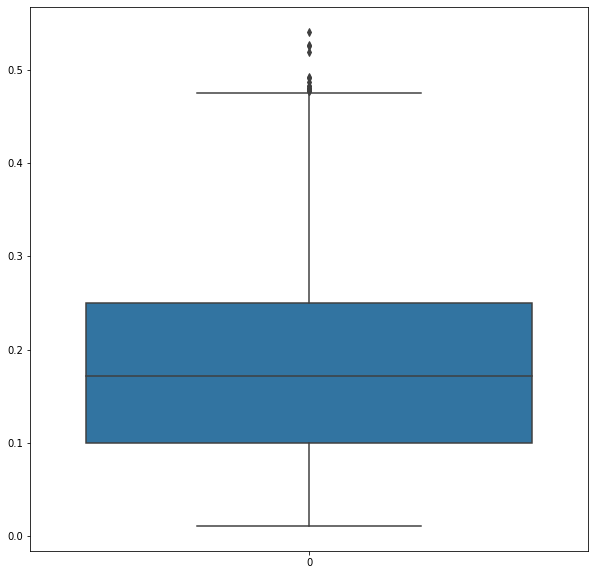

In [64]:
sns.boxplot(ab['Viscera weight'])

In [65]:
p99 = ab['Viscera weight'].quantile(0.99)
p99

0.4375700000000002

<AxesSubplot:>

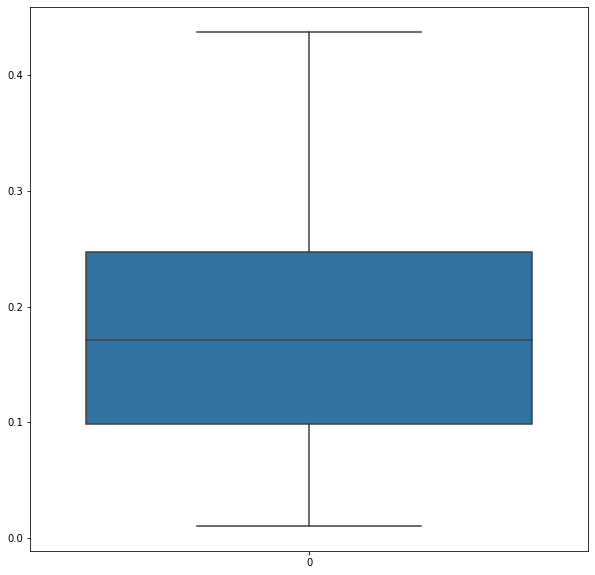

In [66]:
ab = ab[ab['Viscera weight'] <= p99]
sns.boxplot(ab['Viscera weight'])

<AxesSubplot:>

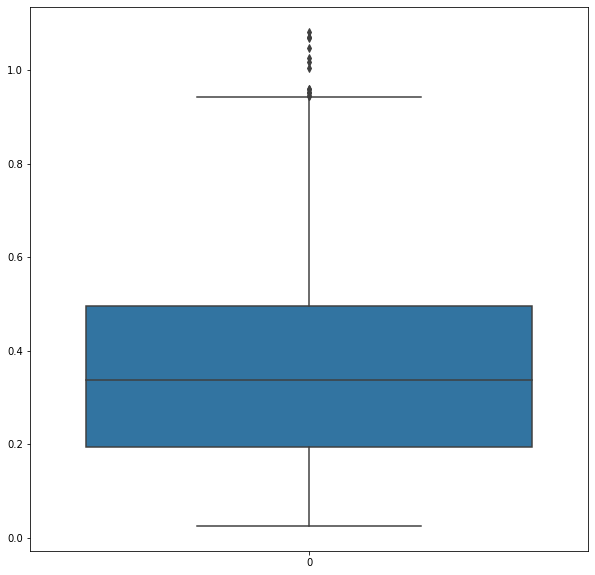

In [67]:
sns.boxplot(ab['Shucked weight'])

In [68]:
p99 = ab['Shucked weight'].quantile(0.99)
p99

0.8599499999999994

<AxesSubplot:>

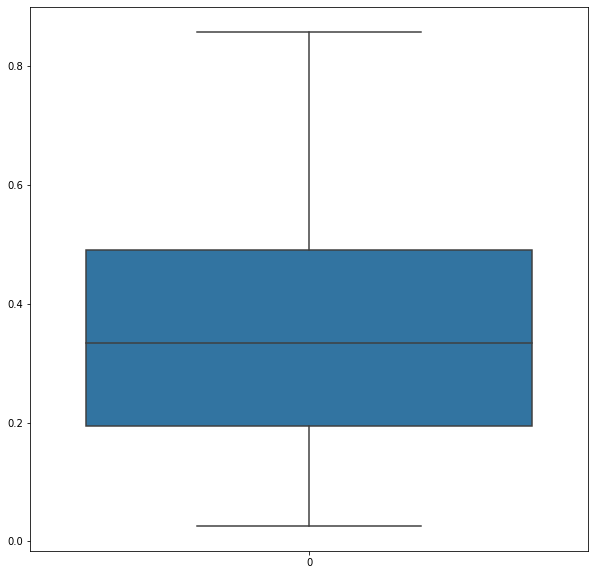

In [69]:
ab = ab[ab['Shucked weight'] <= p99]
sns.boxplot(ab['Shucked weight'])

<AxesSubplot:>

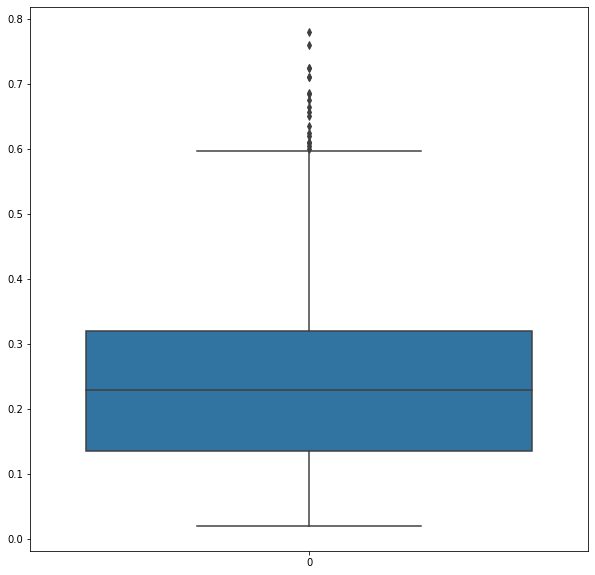

In [70]:
sns.boxplot(ab['Shell weight'])

In [71]:
p99 = ab['Shell weight'].quantile(0.99)
p99

0.5475399999999996

<AxesSubplot:>

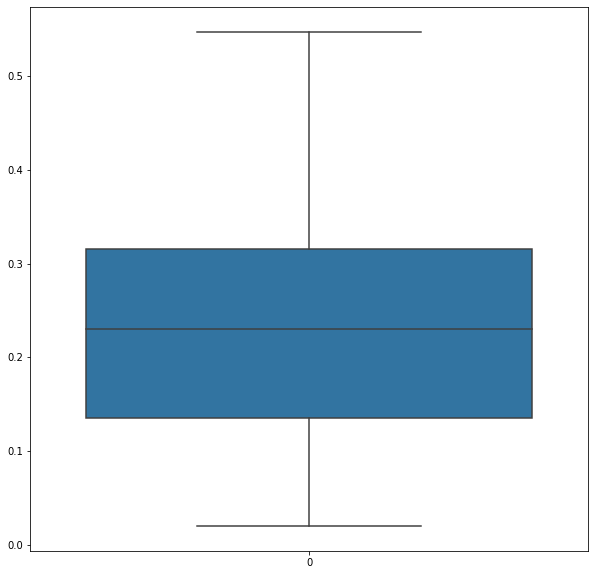

In [72]:
ab = ab[ab['Shell weight'] <= p99]
sns.boxplot(ab['Shell weight'])

<AxesSubplot:>

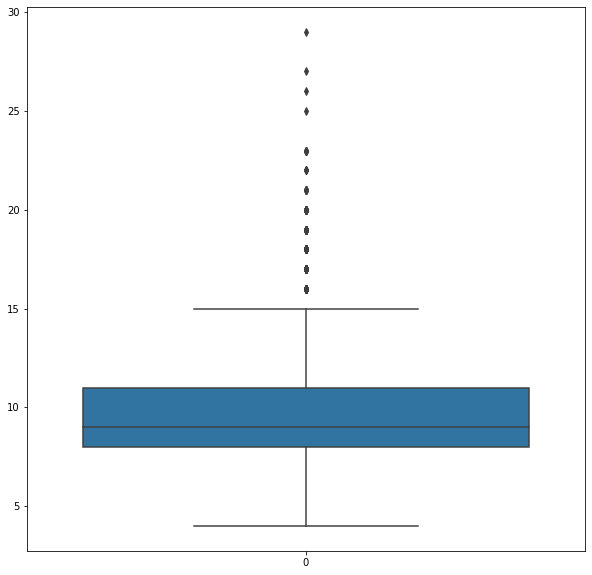

In [73]:
sns.boxplot(ab.Rings)

In [74]:
p01 = ab.Rings.quantile(0.01)
p01

5.0

<AxesSubplot:>

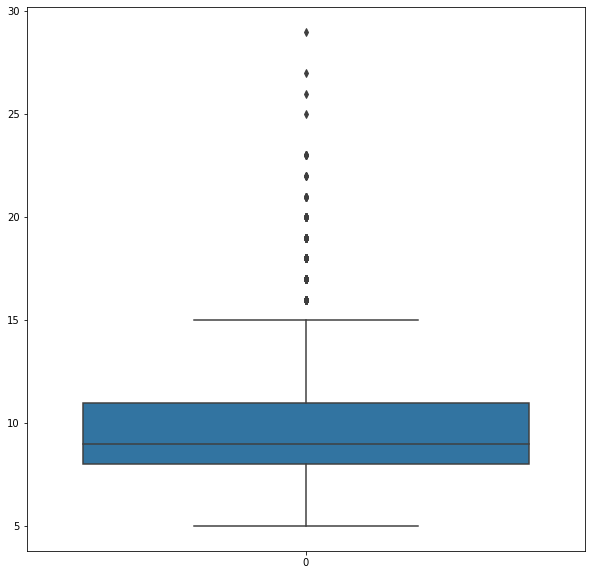

In [75]:
ab = ab[ab.Rings >= p01]
sns.boxplot(ab.Rings)

In [76]:
p99 = ab.Rings.quantile(0.92)
p99

15.0

<AxesSubplot:>

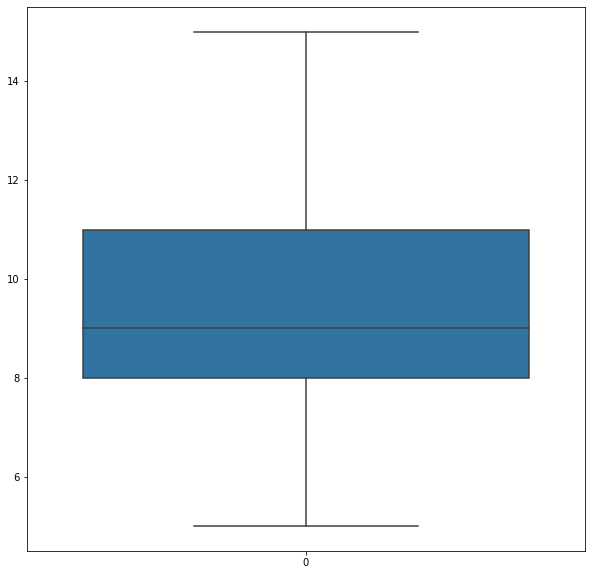

In [77]:
ab = ab[ab.Rings <= p99]
sns.boxplot(ab.Rings)

In [78]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3620 non-null   int32  
 1   Length          3620 non-null   float64
 2   Diameter        3620 non-null   float64
 3   Height          3620 non-null   float64
 4   Whole weight    3620 non-null   float64
 5   Shucked weight  3620 non-null   float64
 6   Viscera weight  3620 non-null   float64
 7   Shell weight    3620 non-null   float64
 8   Rings           3620 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 397.7 KB


##Feature Scaling

In [79]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [80]:
X.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [81]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [82]:
X_scaled = pd.DataFrame(scale.fit_transform(X),columns= X.columns)
X_scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313


In [83]:
X.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [84]:
X_scaled.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503
std,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052
50%,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689
75%,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
y.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

##Train Test Split

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [87]:
X_train.shape

(2923, 7)

In [88]:
X_test.shape

(1254, 7)

In [89]:
y_train.shape

(2923,)

In [90]:
y_test.shape

(1254,)

##Model Building

In [91]:
from sklearn.linear_model import Ridge

In [92]:
r=Ridge()

In [93]:
r.fit(X_train,y_train)

Ridge()

In [94]:
r_pred=r.predict(X_test)
r_pred

array([12.79666142,  9.73082729, 10.5759828 , ...,  9.67503523,
       17.62015894, 11.61193318])

In [95]:
r_pred_train = r.predict(X_train)
r_pred_train

array([12.10842881,  6.70483065,  7.40951508, ...,  9.67501971,
       11.49719609,  8.3484614 ])

In [96]:
from sklearn.linear_model import Lasso

In [97]:
l = Lasso()

In [98]:
l.fit(X_train,y_train)

Lasso()

In [99]:
l_pred = l.predict(X_test)
l_pred

array([9.94902497, 9.94902497, 9.94902497, ..., 9.94902497, 9.94902497,
       9.94902497])

In [100]:
l_pred_train = l.predict(X_train)
l_pred_train

array([9.94902497, 9.94902497, 9.94902497, ..., 9.94902497, 9.94902497,
       9.94902497])

In [101]:
Rings=pd.DataFrame({'Actual_y_value':y_test,'Ridge_pred':r_pred,'Lasso_pred':l_pred})
Rings.head(10)

,Actual_y_value,Ridge_pred,Lasso_pred
668,13,12.796661,9.949025
1580,8,9.730827,9.949025
3784,11,10.575983,9.949025
463,5,5.689987,9.949025
2615,12,10.763115,9.949025
1399,11,12.091017,9.949025
2054,7,7.859295,9.949025
2058,8,9.422339,9.949025
217,7,8.353626,9.949025
1931,9,12.159195,9.949025


##Model Evaluation Metrics

In [102]:
from sklearn import metrics

In [103]:
#Mean-Squared-Error

print(metrics.mean_squared_error(y_test,r_pred))
print(metrics.mean_squared_error(y_test,l_pred))

5.237501870845429
10.54562109553069


In [104]:
#Root Mean Squared Error


print(np.sqrt(metrics.mean_squared_error(y_test,r_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test,l_pred)))

2.2885589070079515
3.2474022072312954


In [107]:
## R2-score

print(metrics.r2_score(y_test,r_pred))
print(metrics.r2_score(y_test,l_pred))

0.5032251848939029
-0.0002476560577491238
